In [ ]:
### Velocity Analysis Utilizing Processed Data from Part 1###

In [51]:
import scvelo as scv
scv.logging.print_version()

Running scvelo 0.2.1 (python 3.7.6) on 2020-09-21 18:25.
 Your version: 		 0.2.1 
 Latest version: 	 0.2.2


In [52]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params('scvelo')  # for beautified visualization

In [53]:
adata_subset

AnnData object with n_obs × n_vars = 3943 × 1874
    obs: 'Clusters', '_X', '_Y', 'Time', 'n_genes', 'percent_mito', 'n_counts', 'leiden'
    var: 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'Time_colors', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'matrix', 'ambiguous', 'spliced', 'unspliced'
    obsp: 'distances', 'connectivities'

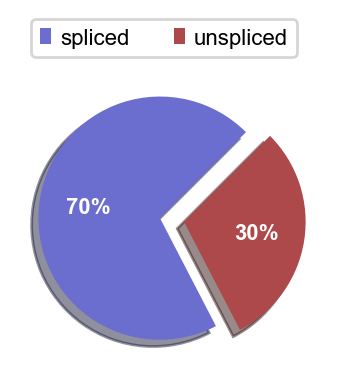

In [54]:
scv.pl.proportions(adata_subset)

In [55]:
scv.pp.filter_and_normalize(adata_subset, min_shared_counts=20, n_top_genes=2000)
scv.pp.moments(adata_subset, n_pcs=30, n_neighbors=30)

Filtered out 1175 genes that are detected 20 counts (shared).
Normalized count data: spliced, unspliced.
Skip filtering by dispersion since number of variables are less than `n_top_genes`
computing neighbors
    finished (0:00:00) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)


In [56]:
scv.tl.velocity(adata_subset)

computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [57]:
scv.tl.velocity_graph(adata_subset)

computing velocity graph
    finished (0:00:04) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


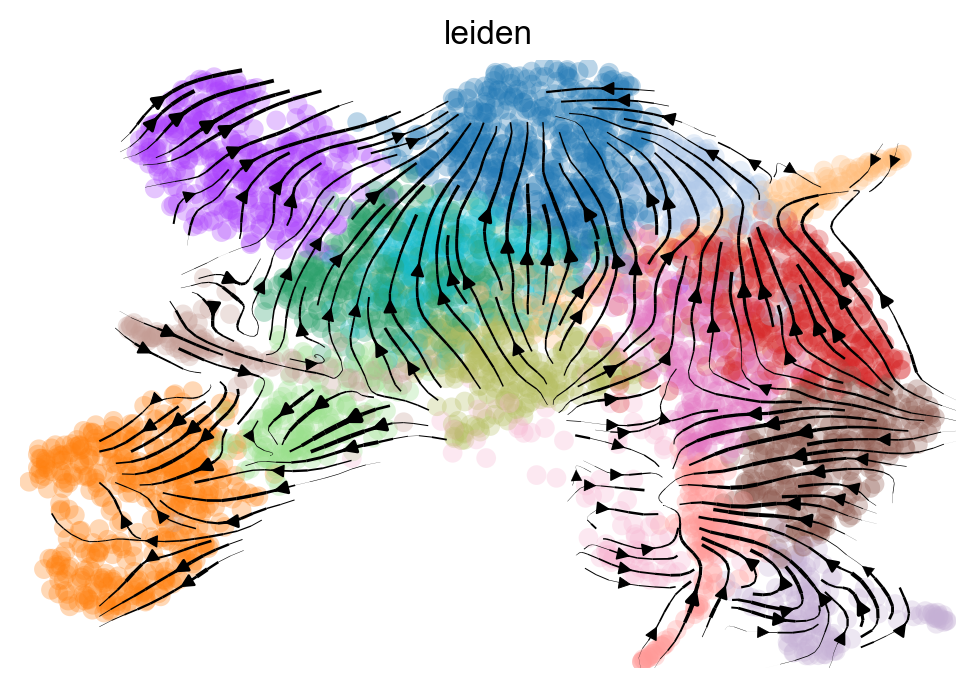

In [58]:
scv.pl.velocity_embedding_stream(adata_subset, basis='umap', color='leiden',
                                legend_loc='none')

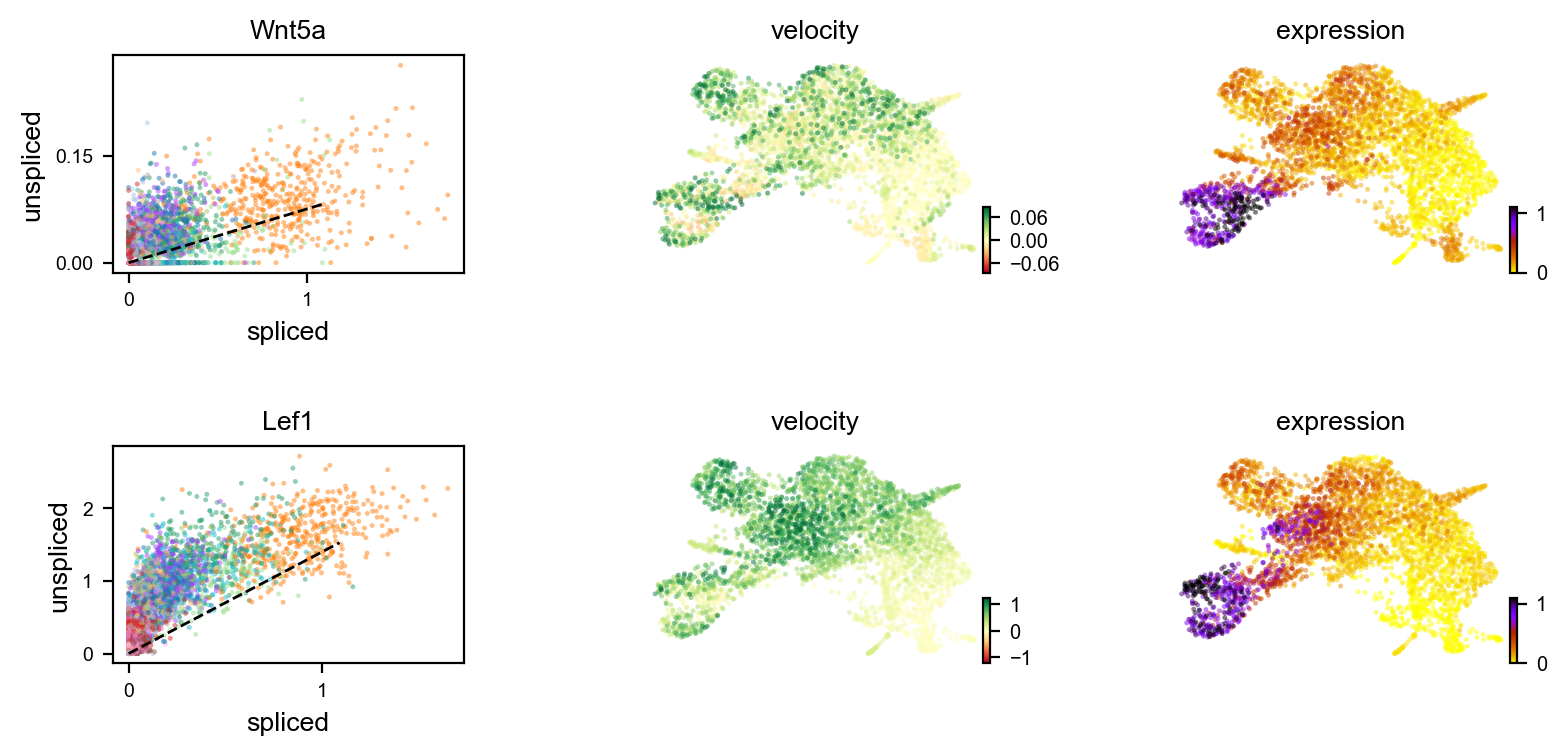

In [61]:
scv.pl.velocity(adata_subset, ['Wnt5a','Lef1'], ncols=1, color='leiden')

In [60]:
scv.tl.rank_velocity_genes(adata_subset, groupby='leiden', min_corr=.3, n_genes=10000)

df = scv.DataFrame(adata_subset.uns['rank_velocity_genes']['names'])
df.head(1000)

ranking velocity genes
    finished (0:00:00) --> added 
    'rank_velocity_genes', sorted scores by group ids (adata.uns) 
    'spearmans_score', spearmans correlation scores (adata.var)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,Lancl3,Clstn2,Mef2c,Col25a1,Cenpe,Fn1,Grem2,Slc26a7,Vax2os,Cdh6,Fat3,Pde3a,Thbs2,Tshz2,Stmn2,Abi3bp
1,Dkk2,Prex2,Efna5,Grem1,Gpc3,Tnfaip6,Cdh6,Eln,Itih5,Mef2c,Khdrbs2,Egflam,Kitl,Gfra1,Egflam,Osmr
2,Gm6634,Kctd1,Lef1,Cdh6,Cpe,Hsph1,Dpep1,Egfl6,Vax2,Adamts5,Ppp1r1a,Zfp423,Dcn,Pde10a,Apod,Flrt2
3,Thsd4,Lamc3,Spon1,Ogn,Efna5,Rgs7bp,Smoc2,Kif26b,Gpc3,Hmcn1,Pcdh9,Clstn2,Errfi1,Ltbp1,Slc26a7,Prss12
4,Hmcn1,Ephb1,Adamts5,Cdc42ep3,Lef1,Atf3,Dab2,Fbln2,Ednra,Fam198b,Cpe,Kif26b,Osmr,Tnfaip6,Ncald,Col4a1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Ltbp1,Grem2,Prss12,Sobp,Meg3,Sobp,Ubash3b,Col4a2,Vcam1,Itih5,Thsd4,Zfhx3,Tnxb,Daam2,Hs3st3b1,Daam2
226,Zfp423,Cdc42ep3,Plcb1,Vax2,Angpt1,Mef2c,Mef2c,Gm6634,Col4a1,Ubash3b,H19,Nav3,Lef1,Agap1,Trim36,Pitx2
227,Gfra1,Rgs7bp,Flrt2,Adgrl3,Gfra1,Mmp19,Lef1,Wnt16,Maf,Osmr,Rgs7bp,Hmcn1,Mef2c,Ednra,Postn,Ndnf
228,Pde3a,Hmcn1,Meg3,Spon1,Rgs10,Lef1,Ednra,Medag,Fn1,Ltbp1,Frem1,Cdh6,Agap1,Mef2c,Cdh6,Cdh6
